In [57]:
%pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.6 kB 487.6 kB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.6 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [77]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
# loading data
%pip install pandas
import pandas as pd

# Load the dataset
data = pd.read_csv('/Insurance Claim.csv')

# Display the first few rows of the dataset
data.head()


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/c4/3a/b84f90ba24d50cbbe79982d5298fb82f6208e2d85bed86b165192fc0f620/pandas-2.1.2-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for numpy<2,>=1.22.4 from https://files.pythonhosted.org/packages/57/09/fe9282ffb0217176b0185900945189b6beaec4f94ff46afb76bcd9b68e30/numpy-1.26.1-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.2 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.2 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 61.2/61.2 kB 808.8 kB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     ------------------------------- ------ 286.7/341.8 kB 8.

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
# For our multivariate linear regression analysis, we'll focus on the columns: bmi, bloodpressure, smoker, region, and claim.
# Now, let's proceed with the following steps:
# Remove any null values from the dataset.
# Remove outliers using the IQR method for the columns: bmi and bloodpressure (assuming we are only considering numerical columns for outlier removal).

In [13]:
# Remove rows with null values in the specified columns
data_cleaned = data[['bmi', 'bloodpressure', 'smoker', 'region', 'claim']].dropna()

# Display the shape of the original and cleaned data to see how many rows were removed
original_shape = data.shape[0]
cleaned_shape = data_cleaned.shape[0]

original_shape, cleaned_shape


(1340, 1337)

In [14]:
def remove_outliers_iqr(df, column):
    """Remove outliers using IQR method for a specified column."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for 'bmi' and 'bloodpressure' columns
data_cleaned = remove_outliers_iqr(data_cleaned, 'bmi')
data_cleaned = remove_outliers_iqr(data_cleaned, 'bloodpressure')

# Display the shape of the data after outlier removal
data_cleaned.shape[0]


1267

In [17]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [48]:
import statsmodels.api as sm

# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data_cleaned, dtype=float,drop_first=True)  # Drop first column to avoid multicollinearity

print(data_encoded)


       bmi  bloodpressure  smoker     claim  region_northwest  \
0     23.2             91       0   1121.87               0.0   
1     30.1             87       0   1131.51               0.0   
2     33.3             82       0   1135.94               0.0   
3     33.7             80       0   1136.40               1.0   
4     34.1            100       0   1137.01               1.0   
...    ...            ...     ...       ...               ...   
1331  41.1            104       1  48970.25               0.0   
1335  35.5             88       1  55135.40               1.0   
1337  34.5             91       1  60021.40               1.0   
1338  30.4            106       1  62592.87               0.0   
1339  47.4            101       1  63770.43               0.0   

      region_southeast  region_southwest  
0                  1.0               0.0  
1                  1.0               0.0  
2                  1.0               0.0  
3                  0.0               0.0  
4   

In [52]:
# Define independent (X) and dependent (y) variables
import numpy as np
X = data_encoded.drop('claim', axis=1)
y = data_encoded['claim']

# Add a constant to the model (it's a best practice to include an intercept in the model)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     369.0
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          2.64e-273
Time:                        22:56:18   Log-Likelihood:                -12936.
No. Observations:                1267   AIC:                         2.589e+04
Df Residuals:                    1260   BIC:                         2.592e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.733e+04   2265.788     -7.650      0.000   -2.18e+04   -1.29e+04
bmi                355.3437     32.117     11.064      0.000     292.336     418.352
bloodpressure      183.2636     23.000      7.968      0.000     138.140     228.387
smoker            2.086e+04    511.798     40.757      0.000    1.99e+04    2.19e+04
region_northwest -1985.7758    577.108     -3.441      0.001   -3117.974    -853.578
region_southeast -2786.3203    565.306     -4.929      0.000   -3895.365   -1677.276
region_southwest -2181.1964    593.799     -3.673      0.000   -3346.140   -1016.252
==============================================================================
Omnibus:                      214.278   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.589
Skew:                           0.996   Prob(JB):                     3.84e-93
Kurtosis:                       5.023   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
print(X.shape)
print(X)

(1267, 7)
      const   bmi  bloodpressure  smoker  region_northwest  region_southeast  \
0       1.0  23.2             91       0               0.0               1.0   
1       1.0  30.1             87       0               0.0               1.0   
2       1.0  33.3             82       0               0.0               1.0   
3       1.0  33.7             80       0               1.0               0.0   
4       1.0  34.1            100       0               1.0               0.0   
...     ...   ...            ...     ...               ...               ...   
1331    1.0  41.1            104       1               0.0               1.0   
1335    1.0  35.5             88       1               1.0               0.0   
1337    1.0  34.5             91       1               1.0               0.0   
1338    1.0  30.4            106       1               0.0               1.0   
1339    1.0  47.4            101       1               0.0               1.0   

      region_southwest  
0   

In [6]:

import numpy as np


def tally_preferences(ballots, rank):
    '''
       Calculate the frequency of a designated rank for each candidate.

                Parameters:
                        ballots: a NumPy array containing ballot data, with one row per ballot and one column per candidate
                        rank: an integer between 1 and the total number of candidates (inclusive)

                Returns:
                         a list or a NumPy vector containing the total number of preferences at the give 'rank' for each candidate
    '''
    ballots_shape = ballots.shape
    preference_fre_list = []

    for candidate in range(ballots_shape[1]):
        count = 0
        for vote in range(ballots_shape[0]):
            if ballots[vote,candidate] == rank:
                count += 1
        
        preference_fre_list.append(count)
    
    return preference_fre_list

ballots = np.array( [[1,2,3,4],[3,2,4,1],[2,4,3,1],[1,2,3,4],[4,3,2,1]])
print(tally_preferences(ballots, 3))

[1, 1, 3, 0]


In [8]:
def select_ballots(ballots, rank, candidate):
    '''
    Returns a selector for all ballots which have allocated a given rank to a given candidate.
    '''
    # Create a bool mask: look at one candidate's column,
    # and find all the rows where that candidate's rank is rank
    return ballots[:, candidate] == rank

print(select_ballots(ballots, 2, 2))

[False False False False  True]


In [2]:
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6]])

# Get the shape of the array
arr_shape = arr.shape
print(arr_shape)  # Outputs: (3, 3)

(2, 3)


<Figure size 800x600 with 0 Axes>

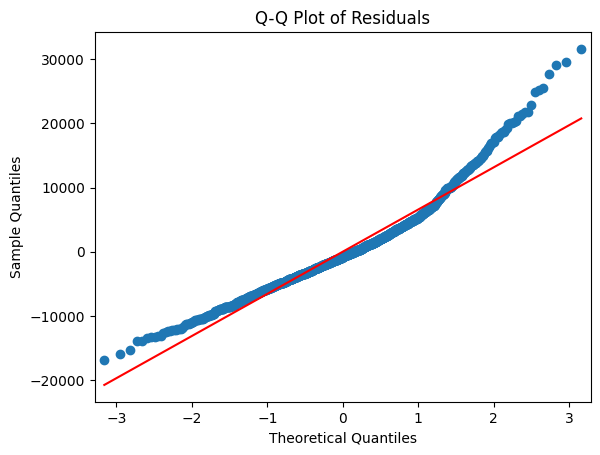

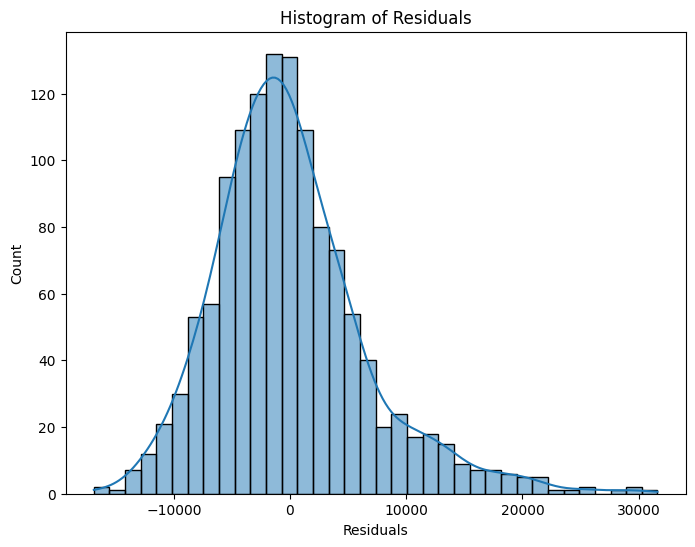

TypeError: 'int' object is not callable

In [76]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 3. Test for Homoscedasticity
f_stat, p_value, _ = het_goldfeldquandt(y, X)
homoscedasticity_p_value = p_value

# 4. Q-Q plot for Normality of Residuals
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# 5. Histogram for Normality of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

# 6. Check for Multicollinearity
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data, homoscedasticity_p_value
